In [2]:
from keras.models import load_model
from mtcnn.mtcnn import MTCNN
from PIL import Image
from numpy import asarray
from numpy import savez_compressed
from numpy import load
from os import listdir
from os.path import isdir
import cv2
import matplotlib.pyplot as plt

In [3]:
directory = 'image/train/'

In [30]:
for subdir in ['ben_afflek', 'elton_john']:
    path = directory + subdir + '/'
    for filename in listdir(path):
        image = cv2.imread(path + filename)
#         image.convert('RGB')
        
        detector = MTCNN()
        results = detector.detect_faces(image)
        for i in range(0, len(results)):
            x1, y1, width, height = results[i]['box']
            
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize((160, 160))
        
        break
    break

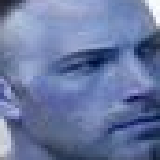

In [31]:
image

# Function

In [32]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    pixels = cv2.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    
    return face_array

In [55]:
model = load_model('model/facenet_keras.h5')

/home/aryoerlangga/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [32]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    
    return face_array

In [37]:
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)
        
    return faces

In [43]:
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
#     for subdir in listdir(directory):
    for subdir in ['ben_afflek', 'elton_john']:
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_faces(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
        
    return asarray(X), asarray(y)

In [44]:
X_train, y_train = load_dataset('image/train/')

>loaded 14 examples for class: ben_afflek
>loaded 17 examples for class: elton_john


In [48]:
X_val, y_val = load_dataset('image/val/')

>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john


In [49]:
savez_compressed('image.npz', X_train, y_train, X_val, y_val)